importing Jupyter notebook from Model.ipynb
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 16, 46, 46]             448
       BatchNorm2d-2           [64, 16, 46, 46]              32
              ReLU-3           [64, 16, 46, 46]               0
         MaxPool2d-4           [64, 16, 23, 23]               0
            Conv2d-5           [64, 32, 21, 21]           4,640
       BatchNorm2d-6           [64, 32, 21, 21]              64
              ReLU-7           [64, 32, 21, 21]               0
         MaxPool2d-8           [64, 32, 10, 10]               0
            Conv2d-9             [64, 32, 8, 8]           9,248
      BatchNorm2d-10             [64, 32, 8, 8]              64
             ReLU-11             [64, 32, 8, 8]               0
        MaxPool2d-12             [64, 32, 4, 4]               0
           Linear-13                  [64, 256]         131

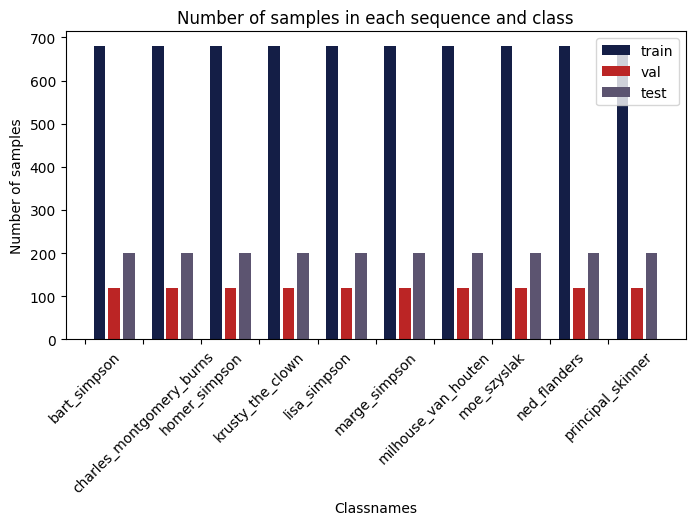

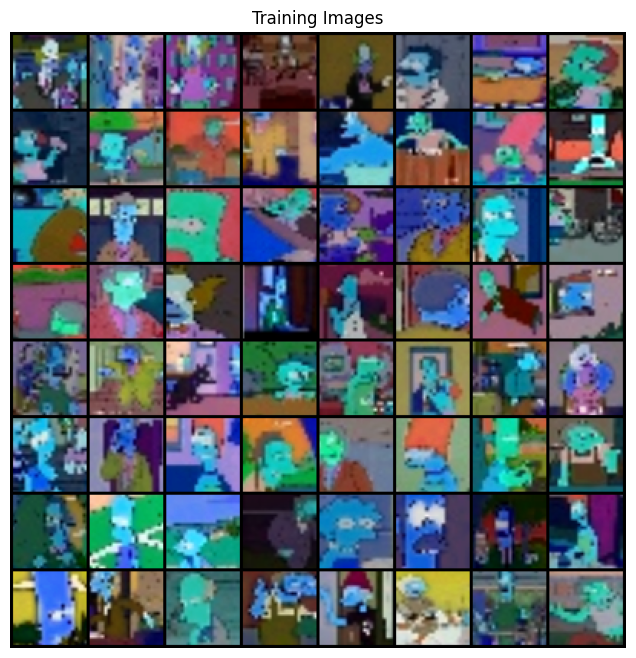

importing Jupyter notebook from LightningModel.ipynb


/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


importing Jupyter notebook from DataModule.ipynb


In [1]:
import import_ipynb
import Model
import Dataset
import LightningModel
import DataModule

import torch
from torch.utils.data import DataLoader
import torchmetrics
from tqdm import tqdm
import torch.nn.functional as F
import numpy as np

import lightning as L
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.callbacks import ModelCheckpoint

import pandas as pd
import matplotlib.pyplot as plt

import time

# _ADD CALLBACKS_

# Traditional Train

In [2]:
torch.manual_seed(123)

# Model initialization
model = Model.TorchModel(num_classes=10)

# Dataset initialization
train_dataset = Dataset.SimpsonsMnistDataset()
val_dataset = Dataset.SimpsonsMnistDataset(sequence="val")
test_dataset = Dataset.SimpsonsMnistDataset(sequence="test")

# Constants
num_epochs = 50
lr = 0.1
batch_size = 128

# Dataloader for simpsonmnistdataset
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)


train_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
val_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
test_acc = torchmetrics.Accuracy(task="multiclass", num_classes=10)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

## Train & Val & Test

In [3]:
torch.manual_seed(123)
pbar = tqdm(range(num_epochs))
for epoch in pbar:
    
    model.train()
    train_loss = []
    for images, true_labels in train_dataloader:
        logits = model(images)
        loss = F.cross_entropy(logits, true_labels)
        train_loss.append(loss.data)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        predicted_labels = torch.argmax(logits, dim=1)
        train_acc(predicted_labels, true_labels)
        
    model.eval()
    val_loss = []
    for images, true_labels in val_dataloader:
        with torch.inference_mode():
            logits = model(images)
            loss = F.cross_entropy(logits, true_labels)
        val_loss.append(loss.data)
        predicted_labels = torch.argmax(logits, dim=1)
        val_acc(predicted_labels, true_labels)
        
    pbar.set_postfix_str(f"(Train) Accuracy: {train_acc.compute():.2f} | Loss: {np.mean(train_loss):.2f} & "+
                            f"(Val) Accuracy: {val_acc.compute():.2f} | Loss: {np.mean(val_loss):.2f}")
    print("")

model.eval()
pbar = tqdm(test_dataloader)
for images, true_labels in pbar:
    with torch.inference_mode():
        logits = model(images)
        predicted_labels = torch.argmax(logits, dim=1)
        test_acc(predicted_labels, true_labels)
    pbar.set_postfix_str(f"(Test) Accuracy: {test_acc.compute():.2f}")

  2%|█▉                                                                                             | 1/50 [00:11<09:27, 11.58s/it, (Train) Accuracy: 0.35 | Loss: 1.91 & (Val) Accuracy: 0.34 | Loss: 2.05]

  4%|███▊                                                                                           | 2/50 [00:21<08:31, 10.65s/it, (Train) Accuracy: 0.41 | Loss: 1.58 & (Val) Accuracy: 0.34 | Loss: 2.00]

  6%|█████▋                                                                                         | 3/50 [00:30<07:44,  9.88s/it, (Train) Accuracy: 0.45 | Loss: 1.40 & (Val) Accuracy: 0.35 | Loss: 2.11]

  8%|███████▌                                                                                       | 4/50 [00:40<07:35,  9.90s/it, (Train) Accuracy: 0.48 | Loss: 1.30 & (Val) Accuracy: 0.39 | Loss: 1.53]

 10%|█████████▌                                                                                     | 5/50 [00:50<07:22,  9.83s/it, (Train) Accuracy: 0.50 | Loss: 1.19 & (Val) Accuracy: 0.39 | Loss: 1.96]

 12%|███████████▍                                                                                   | 6/50 [00:59<07:10,  9.79s/it, (Train) Accuracy: 0.52 | Loss: 1.14 & (Val) Accuracy: 0.39 | Loss: 2.22]

 14%|█████████████▎                                                                                 | 7/50 [01:09<07:03,  9.85s/it, (Train) Accuracy: 0.54 | Loss: 1.09 & (Val) Accuracy: 0.41 | Loss: 1.87]

 16%|███████████████▏                                                                               | 8/50 [01:19<06:53,  9.86s/it, (Train) Accuracy: 0.55 | Loss: 1.03 & (Val) Accuracy: 0.43 | Loss: 1.24]

 18%|█████████████████                                                                              | 9/50 [01:29<06:41,  9.80s/it, (Train) Accuracy: 0.57 | Loss: 0.97 & (Val) Accuracy: 0.43 | Loss: 2.51]

 20%|██████████████████▊                                                                           | 10/50 [01:39<06:34,  9.86s/it, (Train) Accuracy: 0.58 | Loss: 0.94 & (Val) Accuracy: 0.41 | Loss: 3.29]

 22%|████████████████████▋                                                                         | 11/50 [01:49<06:24,  9.85s/it, (Train) Accuracy: 0.59 | Loss: 0.94 & (Val) Accuracy: 0.42 | Loss: 1.40]

 24%|██████████████████████▌                                                                       | 12/50 [01:59<06:16,  9.90s/it, (Train) Accuracy: 0.60 | Loss: 0.87 & (Val) Accuracy: 0.42 | Loss: 3.15]

 26%|████████████████████████▍                                                                     | 13/50 [02:09<06:08,  9.96s/it, (Train) Accuracy: 0.61 | Loss: 0.86 & (Val) Accuracy: 0.44 | Loss: 1.11]

 28%|██████████████████████████▎                                                                   | 14/50 [02:20<06:08, 10.23s/it, (Train) Accuracy: 0.61 | Loss: 0.83 & (Val) Accuracy: 0.45 | Loss: 1.31]

 30%|████████████████████████████▏                                                                 | 15/50 [02:30<05:59, 10.26s/it, (Train) Accuracy: 0.62 | Loss: 0.80 & (Val) Accuracy: 0.46 | Loss: 1.05]

 32%|██████████████████████████████                                                                | 16/50 [02:41<05:56, 10.49s/it, (Train) Accuracy: 0.63 | Loss: 0.78 & (Val) Accuracy: 0.48 | Loss: 1.12]

 34%|███████████████████████████████▉                                                              | 17/50 [02:52<05:50, 10.63s/it, (Train) Accuracy: 0.64 | Loss: 0.75 & (Val) Accuracy: 0.47 | Loss: 2.77]

 36%|█████████████████████████████████▊                                                            | 18/50 [03:03<05:45, 10.78s/it, (Train) Accuracy: 0.64 | Loss: 0.76 & (Val) Accuracy: 0.48 | Loss: 1.53]

 38%|███████████████████████████████████▋                                                          | 19/50 [03:13<05:30, 10.65s/it, (Train) Accuracy: 0.65 | Loss: 0.70 & (Val) Accuracy: 0.47 | Loss: 2.35]

 40%|█████████████████████████████████████▌                                                        | 20/50 [03:25<05:23, 10.79s/it, (Train) Accuracy: 0.65 | Loss: 0.72 & (Val) Accuracy: 0.47 | Loss: 2.56]

 42%|███████████████████████████████████████▍                                                      | 21/50 [03:35<05:11, 10.73s/it, (Train) Accuracy: 0.66 | Loss: 0.70 & (Val) Accuracy: 0.46 | Loss: 3.76]

 44%|█████████████████████████████████████████▎                                                    | 22/50 [03:45<04:48, 10.32s/it, (Train) Accuracy: 0.66 | Loss: 0.71 & (Val) Accuracy: 0.47 | Loss: 1.11]

 46%|███████████████████████████████████████████▏                                                  | 23/50 [03:54<04:34, 10.16s/it, (Train) Accuracy: 0.67 | Loss: 0.65 & (Val) Accuracy: 0.48 | Loss: 1.45]

 48%|█████████████████████████████████████████████                                                 | 24/50 [04:05<04:24, 10.18s/it, (Train) Accuracy: 0.67 | Loss: 0.67 & (Val) Accuracy: 0.48 | Loss: 1.79]

 50%|███████████████████████████████████████████████                                               | 25/50 [04:15<04:17, 10.31s/it, (Train) Accuracy: 0.68 | Loss: 0.63 & (Val) Accuracy: 0.48 | Loss: 3.89]

 52%|████████████████████████████████████████████████▉                                             | 26/50 [04:27<04:18, 10.76s/it, (Train) Accuracy: 0.68 | Loss: 0.63 & (Val) Accuracy: 0.48 | Loss: 0.95]

 54%|██████████████████████████████████████████████████▊                                           | 27/50 [04:39<04:15, 11.13s/it, (Train) Accuracy: 0.69 | Loss: 0.60 & (Val) Accuracy: 0.49 | Loss: 1.42]

 56%|████████████████████████████████████████████████████▋                                         | 28/50 [04:52<04:14, 11.57s/it, (Train) Accuracy: 0.69 | Loss: 0.58 & (Val) Accuracy: 0.49 | Loss: 1.22]

 58%|██████████████████████████████████████████████████████▌                                       | 29/50 [05:04<04:11, 11.96s/it, (Train) Accuracy: 0.70 | Loss: 0.58 & (Val) Accuracy: 0.50 | Loss: 1.31]

 60%|████████████████████████████████████████████████████████▍                                     | 30/50 [05:17<04:02, 12.12s/it, (Train) Accuracy: 0.70 | Loss: 0.58 & (Val) Accuracy: 0.50 | Loss: 1.56]

 62%|██████████████████████████████████████████████████████████▎                                   | 31/50 [05:29<03:50, 12.13s/it, (Train) Accuracy: 0.70 | Loss: 0.56 & (Val) Accuracy: 0.50 | Loss: 1.96]

 64%|████████████████████████████████████████████████████████████▏                                 | 32/50 [05:40<03:29, 11.62s/it, (Train) Accuracy: 0.71 | Loss: 0.57 & (Val) Accuracy: 0.51 | Loss: 1.11]

 66%|██████████████████████████████████████████████████████████████                                | 33/50 [05:52<03:19, 11.73s/it, (Train) Accuracy: 0.71 | Loss: 0.54 & (Val) Accuracy: 0.51 | Loss: 1.57]

 68%|███████████████████████████████████████████████████████████████▉                              | 34/50 [06:03<03:07, 11.71s/it, (Train) Accuracy: 0.71 | Loss: 0.54 & (Val) Accuracy: 0.51 | Loss: 1.62]

 70%|█████████████████████████████████████████████████████████████████▊                            | 35/50 [06:16<02:58, 11.90s/it, (Train) Accuracy: 0.72 | Loss: 0.55 & (Val) Accuracy: 0.51 | Loss: 2.14]

 72%|███████████████████████████████████████████████████████████████████▋                          | 36/50 [06:26<02:41, 11.56s/it, (Train) Accuracy: 0.72 | Loss: 0.56 & (Val) Accuracy: 0.52 | Loss: 0.98]

 74%|█████████████████████████████████████████████████████████████████████▌                        | 37/50 [06:37<02:28, 11.45s/it, (Train) Accuracy: 0.72 | Loss: 0.50 & (Val) Accuracy: 0.52 | Loss: 1.10]

 76%|███████████████████████████████████████████████████████████████████████▍                      | 38/50 [06:49<02:18, 11.52s/it, (Train) Accuracy: 0.73 | Loss: 0.51 & (Val) Accuracy: 0.52 | Loss: 1.52]

 78%|█████████████████████████████████████████████████████████████████████████▎                    | 39/50 [07:00<02:03, 11.23s/it, (Train) Accuracy: 0.73 | Loss: 0.51 & (Val) Accuracy: 0.53 | Loss: 1.23]

 80%|███████████████████████████████████████████████████████████████████████████▏                  | 40/50 [07:09<01:47, 10.78s/it, (Train) Accuracy: 0.73 | Loss: 0.48 & (Val) Accuracy: 0.53 | Loss: 0.97]

 82%|█████████████████████████████████████████████████████████████████████████████                 | 41/50 [07:21<01:40, 11.15s/it, (Train) Accuracy: 0.73 | Loss: 0.47 & (Val) Accuracy: 0.53 | Loss: 1.20]

 84%|██████████████████████████████████████████████████████████████████████████████▉               | 42/50 [07:32<01:27, 10.92s/it, (Train) Accuracy: 0.74 | Loss: 0.48 & (Val) Accuracy: 0.54 | Loss: 1.80]

 86%|████████████████████████████████████████████████████████████████████████████████▊             | 43/50 [07:42<01:15, 10.78s/it, (Train) Accuracy: 0.74 | Loss: 0.50 & (Val) Accuracy: 0.53 | Loss: 3.28]

 88%|██████████████████████████████████████████████████████████████████████████████████▋           | 44/50 [07:53<01:04, 10.67s/it, (Train) Accuracy: 0.74 | Loss: 0.49 & (Val) Accuracy: 0.54 | Loss: 1.06]

 90%|████████████████████████████████████████████████████████████████████████████████████▌         | 45/50 [08:04<00:54, 10.80s/it, (Train) Accuracy: 0.74 | Loss: 0.45 & (Val) Accuracy: 0.54 | Loss: 1.30]

 92%|██████████████████████████████████████████████████████████████████████████████████████▍       | 46/50 [08:15<00:44, 11.05s/it, (Train) Accuracy: 0.75 | Loss: 0.44 & (Val) Accuracy: 0.54 | Loss: 1.86]

 94%|████████████████████████████████████████████████████████████████████████████████████████▎     | 47/50 [08:27<00:33, 11.12s/it, (Train) Accuracy: 0.75 | Loss: 0.46 & (Val) Accuracy: 0.54 | Loss: 1.06]

 96%|██████████████████████████████████████████████████████████████████████████████████████████▏   | 48/50 [08:39<00:22, 11.41s/it, (Train) Accuracy: 0.75 | Loss: 0.45 & (Val) Accuracy: 0.55 | Loss: 1.59]

 98%|████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [08:50<00:11, 11.30s/it, (Train) Accuracy: 0.75 | Loss: 0.44 & (Val) Accuracy: 0.55 | Loss: 1.21]

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [09:01<00:00, 10.84s/it, (Train) Accuracy: 0.75 | Loss: 0.43 & (Val) Accuracy: 0.55 | Loss: 1.16]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:01<00:00, 10.88it/s, (Test) Accuracy: 0.67]


# LightningModel Train

In [4]:
L.pytorch.seed_everything(123)
model = Model.TorchModel(num_classes=10)
lightning_model = LightningModel.LightningModel(model=model, lr=lr)
datamodule = DataModule.DataModule()
trainer = L.Trainer(max_epochs=num_epochs,
                   devices="auto",
                   deterministic=True,
                   logger=CSVLogger(save_dir="./lightning_logs", name="simpson_mnist"))

Global seed set to 123
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [5]:
start = time.time()
trainer.fit(model=lightning_model, datamodule=datamodule)
end = time.time()
print(f"Time consumed: {(end - start):.2f}")

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params
-------------------------------------------------
0 | model     | TorchModel         | 188 K 
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
188 K     Trainable params
0         Non-trainable params
188 K     Total params
0.754     Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|                                                                                                                                                   | 0/2 [00:00<?, ?it/s]

/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 106/106 [00:07<00:00, 15.14it/s, v_num=26]
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|████████████████████████████████████████████████████████████████████████████████| 106/106 [00:05<00:00, 17.84it/s, v_num=26, val_loss=1.450, val_acc=0.517, train_loss=1.840, train_acc=0.368]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|████████████████████████████████████████████████████████████████████████████████| 106/106 [00:07<00:00, 13.82it/s, v_num=26, val_loss=1.250, val_acc=0.575, train_loss=1.490, train_acc=0.499]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|████████████████████████████████████████████████████████████████████████████████| 106/106 [00:08<00:00, 13.15it/s, v_num=26, val_loss=1.320, val_acc=0.571, train_loss=1.350, train_acc=0.547]
Validation: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████████████████████████████████████

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|███████████████████████████████████████████████████████████████████████████████| 106/106 [00:08<00:00, 12.64it/s, v_num=26, val_loss=0.607, val_acc=0.816, train_loss=0.402, train_acc=0.863]
Time consumed: 428.01


In [7]:
def plot_loss_and_acc(
    log_dir, loss_ylim=(0.0, 0.9), acc_ylim=(0.7, 1.0), save_loss=None, save_acc=None
):

    metrics = pd.read_csv(f"{log_dir}/metrics.csv")

    aggreg_metrics = []
    agg_col = "epoch"
    for i, dfg in metrics.groupby(agg_col):
        agg = dict(dfg.mean())
        agg[agg_col] = i
        aggreg_metrics.append(agg)

    df_metrics = pd.DataFrame(aggreg_metrics)
    df_metrics[["train_loss", "val_loss"]].plot(
        grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
    )

    df_metrics[["train_acc", "val_acc"]].plot(
        grid=True, legend=True, xlabel="Epoch", ylabel="ACC"
    )

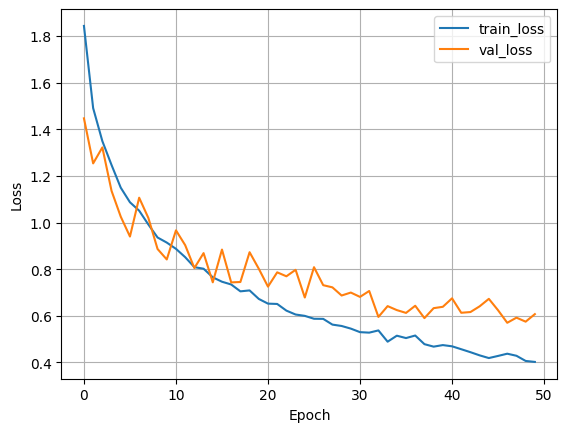

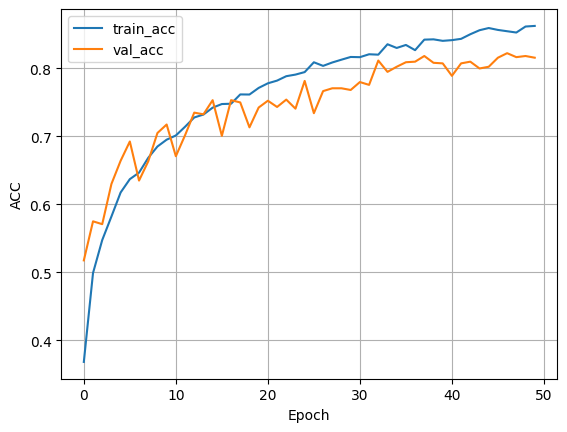

In [8]:
plot_loss_and_acc(log_dir=trainer.logger.log_dir)

In [6]:
trainer.test(dataloaders=datamodule)

/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:149: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at ./lightning_logs/simpson_mnist/version_26/checkpoints/epoch=49-step=5300.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/simpson_mnist/version_26/checkpoints/epoch=49-step=5300.ckpt
/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the 

Testing DataLoader 0: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 34.44it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.8220000267028809     │
│         test_loss         │    0.5938977599143982     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5938977599143982, 'test_acc': 0.8220000267028809}]

# Hyperparameter Tuning

In [18]:
from lightning.pytorch.tuner import Tuner
tuner = Tuner(trainer)
L.pytorch.seed_everything(123)
model = Model.TorchModel(num_classes=10)
lightning_model = LightningModel.LightningModel(model=model, lr=lr)
datamodule = DataModule.DataModule()

Global seed set to 123


### Find a good batch size

In [19]:
batch_size_finder = tuner.scale_batch_size(model=lightning_model, datamodule=datamodule)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 2 succeeded, trying batch size 4
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 4 succeeded, trying batch size 8
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 8 succeeded, trying batch size 16
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 16 succeeded, trying batch size 32
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 32 succeeded, trying batch size 64
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 64 succeeded, trying batch size 128
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 128 succeeded, trying batch size 256
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 256 succeeded, trying batch size 512
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 512 succeeded, trying batch size 1024
`Trainer.fit` stopped: `max_steps=3` reached.
Batch size 1024 succeeded, trying batch size 2048
`Trainer.fit` stopped: `max_ste

In [20]:
batch_size_finder

2048

### Find a good learning rate

In [21]:
L.pytorch.seed_everything(123)
model = Model.TorchModel(num_classes=10)
lightning_model = LightningModel.LightningModel(model=model, lr=lr)
datamodule = DataModule.DataModule(batch_size=batch_size_finder)
lr_finder = tuner.lr_find(model=lightning_model, datamodule=datamodule, early_stop_threshold=100.0)

Global seed set to 123
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Finding best initial lr: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:24<00:00,  2.05s/it]
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at /home/onuraydemir/Desktop/Code/Notebooks/.lr_find_08a8f650-0eb7-41a0-84ac-1d83176d9aad.ckpt
Restored all states from the checkpoint at /home/onuraydemir/Desktop/Code/Notebooks/.lr_find_08a8f650-0eb7-41a0-84ac-1d83176d9aad.ckpt


In [22]:
lr_finder.suggestion()

0.8317637711026709

In [23]:
recommended_lr = lr if lr_finder.suggestion() is None else lr_finder.suggestion()
recommended_lr

0.8317637711026709

# Trying combination of other hyperparameters
- ex: sunum_deneme.py

# Accelerated Traning

### Mixed Precision Training

In [30]:
L.pytorch.seed_everything(123)
model = Model.TorchModel(num_classes=10)
lightning_model = LightningModel.LightningModel(model=model, lr=recommended_lr)
trainer = L.Trainer(max_epochs=num_epochs,
                    devices="auto",
                    deterministic=True,
                    precision="16-mixed",
                    logger=CSVLogger(save_dir="./lightning_logs", name="simpson_mnist"))
datamodule = DataModule.DataModule(batch_size=batch_size_finder)

Global seed set to 123
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [31]:
start = time.time()
trainer.fit(model=lightning_model, datamodule=datamodule)
end = time.time()
print(f"Time consumed: {(end - start):.2f}")

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type               | Params
-------------------------------------------------
0 | model     | TorchModel         | 188 K 
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
188 K     Trainable params
0         Non-trainable params
188 K     Total params
0.754     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/lightning/pytorch/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.69s/it, v_num=30]
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.83s/it, v_num=30, val_loss=2.300, val_acc=0.136, train_loss=2.240, train_acc=0.188]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.78s/it, v_num=30, val_loss=2.230, val_acc=0.233, train_loss=2.250, train_acc=0.183]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.82s/it, v_num=30, val_loss=2.180, val_acc=0.313, train_loss=1.940, train_acc=0.338]
Validation: 0it [00:00, ?it/s]
Epoch 4: 100%|██████████████████████████████████████████

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  2.00s/it, v_num=30, val_loss=0.898, val_acc=0.708, train_loss=0.788, train_acc=0.732]
Time consumed: 290.64


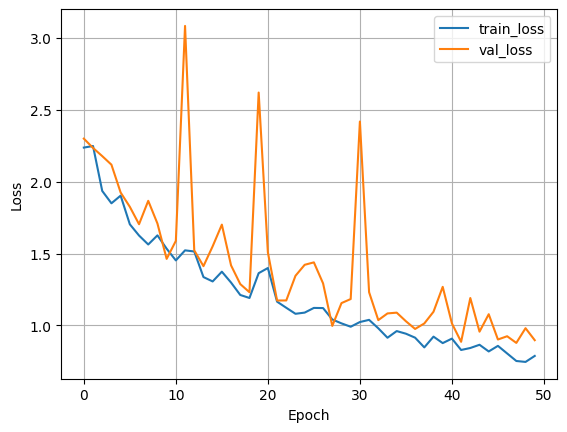

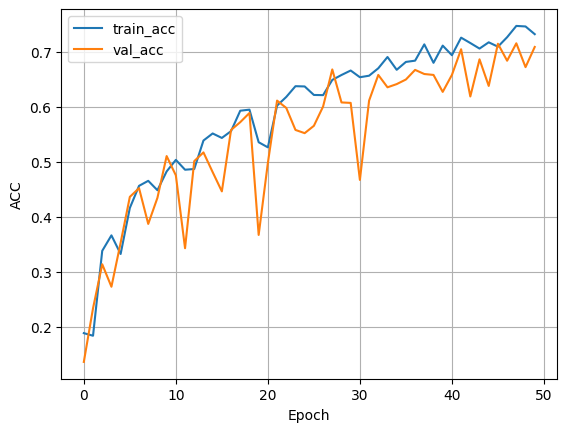

In [32]:
plot_loss_and_acc(log_dir=trainer.logger.log_dir)

In [33]:
trainer.test(dataloaders=datamodule)

/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:149: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at ./lightning_logs/simpson_mnist/version_30/checkpoints/epoch=49-step=150.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at ./lightning_logs/simpson_mnist/version_30/checkpoints/epoch=49-step=150.ckpt
/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `n

Testing DataLoader 0: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.75it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.7310000061988831     │
│         test_loss         │    0.8170919418334961     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.8170919418334961, 'test_acc': 0.7310000061988831}]